In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Read the data table as dataframe

In [11]:
data = pd.read_table("Res-AllTaps.txt", header='infer', delimiter='\t', decimal='.', na_values='NaN')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sujet        3550 non-null   int64  
 1   Group        3550 non-null   int64  
 2   Severity     3550 non-null   int64  
 3   SSI          3550 non-null   int64  
 4   Music        3550 non-null   int64  
 5   Pattern      3550 non-null   int64  
 6   File         3550 non-null   int64  
 7   TrainNumber  3550 non-null   int64  
 8   BeatNumber   3550 non-null   int64  
 9   IRI          1237 non-null   float64
 10  RT           3333 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 305.2 KB


,Sujet,Group,Severity,SSI,Music,Pattern,File,TrainNumber,BeatNumber,IRI,RT
0,2,0,0,0,1,1,1,1,1,NaN,-0.0265
1,2,0,0,0,1,1,1,1,2,0.5385,0.0115
2,2,0,0,0,1,1,1,1,3,0.5049,0.0139
3,2,0,0,0,1,1,1,1,4,0.4805,-0.0056
4,2,0,0,0,1,1,1,1,5,0.4686,-0.0371


2.Filter the dataframe to consider only a part of the data

In [105]:
data_periodic_along = data[data["Pattern"]==1]
data_aperiodic = data[data["Pattern"]==2]
data_PNS = data[(data["Pattern"]==1)&(data["Group"]==0)]
data_PWS = data[(data["Pattern"]==1)&(data["Group"]==1)]

3. Calculate the mean and standard deviation of a data set

In [38]:
mean_PNS=data_PNS['IRI'].mean(skipna=True)
mean_PWS=data_PWS['IRI'].mean(skipna=True)

print("IRI Mean: -----")
print(f"|   PNS: {mean_PNS:.4f}")
print(f"|   PWS: {mean_PWS:.4f}")
print("---------------")

IRI Mean: -----
|   PNS: 0.4945
|   PWS: 0.4948
---------------


4. Plot the mean value and standard deviation of the IRI for both groups (PWS and PNS) in the PeriodicAlong cindition only.

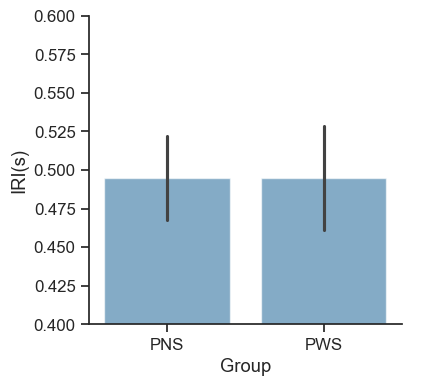

In [53]:
sns.set_context('notebook', font_scale=1.1, rc={'lines.width':1})

g = sns.catplot(data=data_periodic_along, kind='bar', x='Group', y='IRI', errorbar='sd', alpha=.6, height=4)
g.set_axis_labels("Group", "IRI(s)")
g.set(ylim=(0.4,0.6))
g.set_xticklabels(["PNS", "PWS"])

plt.show()

5. Graphically represent, for each group, the variation of the IRI over time (to detect possible acceleration or deceleration)

In [111]:
# Create new variable TapNb
data['TapNb'] = data['BeatNumber']+8*(data['TrainNumber']+1)
print(data.columns.values)

# Update filtered dataframes
data_periodic_along = data[data["Pattern"]==1]
data_aperiodic = data[data["Pattern"]==2]
data_PNS = data[(data["Pattern"]==1)&(data["Group"]==0)]
data_PWS = data[(data["Pattern"]==1)&(data["Group"]==1)]

['Sujet' 'Group' 'Severity' 'SSI' 'Music' 'Pattern' 'File' 'TrainNumber'
 'BeatNumber' 'IRI' 'RT' 'TapNb']


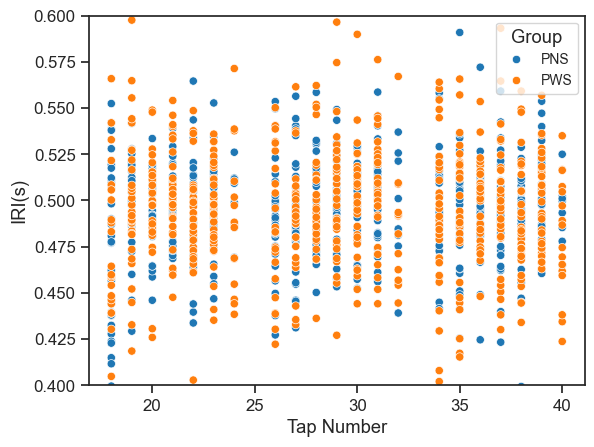

In [121]:
groups = {0:"PNS", 1:"PWS"}
g = sns.scatterplot(x='TapNb', y='IRI', hue='Group', data=data.assign(Group=data['Group'].map(groups)))
g.set_ylabel('IRI(s)')
g.set_xlabel("Tap Number")
g.legend(title="Group", loc='upper right', fontsize=10)
g.set(ylim=(0.4,0.6))
plt.show(g)

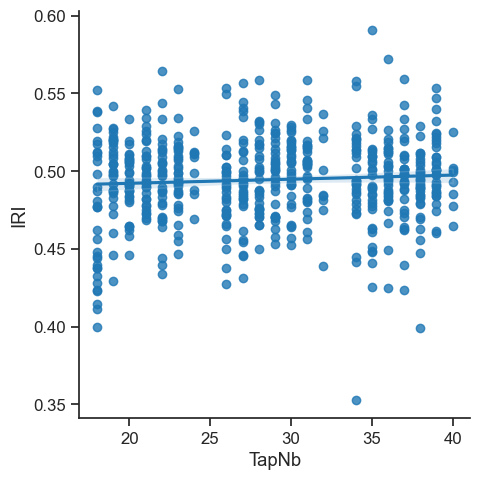

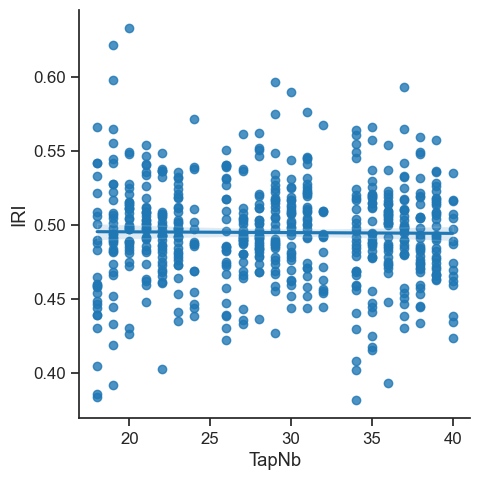

In [115]:
g_pns = sns.lmplot(x='TapNb', y='IRI', data=data_PNS)
g_pws = sns.lmplot(x='TapNb', y='IRI', data=data_PWS)
plt.show()